<a href="https://colab.research.google.com/github/derzhavin3016/CompMath/blob/master/Lab3/Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашняя лабораторная работа №3 по вычислительной математике

Державин Андрей, Б01-909 группа

## Задача __IV.12.7(г)__

$$
\left\lbrace
\begin{matrix}
\cos{y} - x = -0.85 \\
\sin{x} - y = 1.32 \\
\end{matrix}
\right., \: \: \varepsilon = 10^{-5}
$$

In [ ]:
import numpy as np 
from matplotlib import pyplot as plt

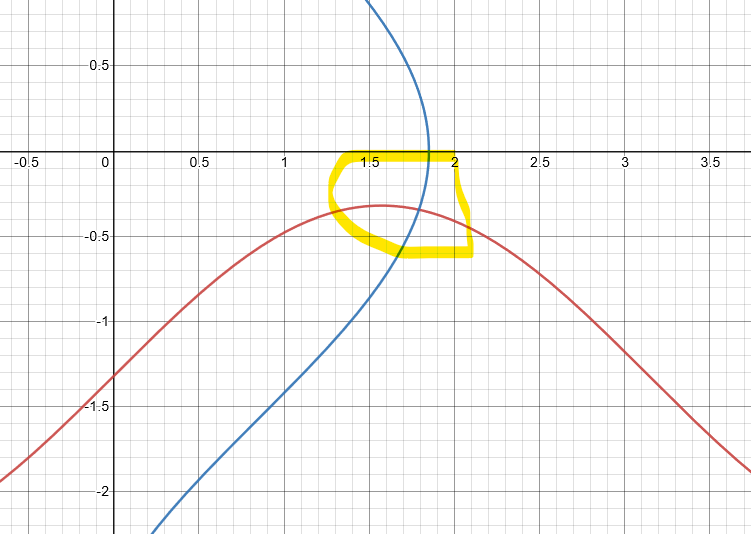

### Метод простых итераций

По графику видно, что решение находится в области
$$
G : 
\left\lbrace
\begin{matrix}
x \in \left[1.5, 2 \right]\\
y \in \left[-0.5, 0 \right]
\end{matrix}
\right\rbrace
$$
Выберем начальную точку для МПИ как середину:
$$
\vec{x}_0 = (1.8, -0.3)
$$
Сузим область:
$$
G : 
\left\lbrace
\begin{matrix}
x \in \left[1.7, 1.9 \right]\\
y \in \left[-0.4, -0.2 \right]
\end{matrix}
\right\rbrace
$$


Приведём систему к виду $$\vec{x}_{n+1} = \vec{\varphi}\left(\vec{x}_{n} \right)$$:
$$
\left\lbrace
\begin{matrix}
x = 0.85 + \cos{y}\\
y = -1.32 + \sin{x}\\
\end{matrix}
\right. \Leftrightarrow
\left\lbrace
\begin{matrix}
\varphi_1 = x_{n+1} = 0.85 + \cos{y_n}\\
\varphi_2 = y_{n+1} = -1.32 + \sin{x_n}\\
\end{matrix}
\right.
$$
Вычислим матрицу:
$$
M = \left( 
\begin{matrix}
\frac{\partial \varphi_1}{\partial x} & \frac{\partial \varphi_1}{\partial y} \\
\frac{\partial \varphi_2}{\partial x} & \frac{\partial \varphi_2}{\partial y} \\
\end{matrix}
\right)
$$

$$
\frac{\partial \varphi_1}{\partial x} = 0, \: 
\frac{\partial \varphi_1}{\partial y} = -\sin{y_n}
$$
$$
\left|\frac{\partial \varphi_1}{\partial y}\right| \leqslant
\sin{0.4} < 0.4
$$
$$
\frac{\partial \varphi_2}{\partial x} = \cos{x_n}, \: 
\frac{\partial \varphi_2}{\partial y} = 0
$$
$$
\left|\frac{\partial \varphi_2}{\partial x} \right| \leqslant
\left|\cos{1.9}\right| < 0.33
$$
Таким образом, $$\left|\left| M \right|\right|_2 < 1 \Rightarrow \text{метод простых итераций сходится}$$

In [ ]:
epsilon = 1e-5
x, y = 1.8, -0.3
xprev, yprev = 0, 0
iters = 0

while 1:
  iters += 1
  xprev, yprev = x, y
  x, y = 0.85 + np.cos(y), -1.32 + np.sin(x)

  if max(abs(x - xprev), abs(y - yprev)) < epsilon:
    break

print(f'(x, y) = ({x}, {y})')
print(f'iters = {iters}')
mpi_it = iters

(x, y) = (1.7913388724813675, -0.34421976363320883)
iters = 8


### Метод Ньютона

Функции для подсчета норм матрицы

In [ ]:
def norm_1(matr):
  max_s = 0
  rows, cols = matr.shape
  for j in range(cols):
    sum = 0
    for i in range(rows):
      sum += abs(matr[i][j])
    max_s = max(sum, max_s)

  return max_s

def norm_2(matr):
  rows, cols = matr.shape
  max_s = 0
  for i in range(rows):
    max_s = max(sum(abs(matr[i])), max_s)

  return max_s

def norm_3(matr):
  return np.sqrt(max(abs(np.linalg.eigvals(np.dot(matr, matr.transpose())))))

def vec_n1(vec):
  return max(abs(vec))

def vec_n2(vec):
  return sum(abs(vec))

def vec_n3(vec):
  return np.sqrt(sum(vec * vec))

$$
\vec{x}_{n+1} = \vec{x}_n - J^{-1}(\vec{x}_n) \cdot \vec{f}(\vec{x}_n)
$$
Где 
$$
\left\lbrace
\begin{matrix}
f_1 = \cos{y} - x + 0.85\\
f_2 = -y  -1.32 + \sin{x}\\
\end{matrix}
\right.
$$
Будем решать СЛАУ для приращения:
$$
  J(⃗\vec{x}_n) \cdot \overrightarrow{\Delta x} = - \vec{f}(\vec{x}_n)
$$
$$
J= \left(
\begin{matrix}
-1 & -\sin{y} \\
 \cos{x} & -1 \\
\end{matrix}
\right)
$$

In [ ]:
def get_LUD(matr):
  sz = matr.shape[0]
  D = np.zeros((sz, sz))
  L = np.zeros((sz, sz))
  U = np.zeros((sz, sz))
  for i in range(sz):
    for j in range(sz):
      if i == j:
        D[i][j] = matr[i][j]
      elif i > j:
        L[i][j] = matr[i][j]
      else:
        U[i][j] = matr[i][j]
  return L, U, D

def zeidel(matr, b, eps, norm):
  converged = False
  
  x = np.zeros((matr.shape[0], 1))
  
  L, U, D = get_LUD(matr)
  LDinv = np.linalg.inv(L + D)
  LDinvU = np.dot(LDinv, U)
  
  while not converged:
    x_new = -np.dot(LDinvU, x) + np.dot(LDinv, b)
    converged = norm(x_new - x) < eps
    x = x_new
  
  return x.transpose()[0]

In [ ]:
def getJ(x):
  return np.array([
    [-1, -np.sin(x[1])],
    [np.cos(x[0]), -1]
  ])

def f(x):
  return np.array([[
    np.cos(x[1]) - x[0] + 0.85,                
    np.sin(x[0]) - x[1] - 1.32,                
  ]]
  ).transpose()

def runNewton(x):
  J = getJ(x)
  Jinv = np.linalg.inv(J)

  mu = norm_1(J) * norm_1(Jinv)
  assert mu < 10, f'Слишком большая невязка {mu}'
  
  return zeidel(J, -f(x), 1e-12, norm_2)

x = np.array([1.8, -0.3])
converged = False
iters = 0

while not converged:
  iters += 1
  xprev = x
  dx = runNewton(x)
  x += dx

  converged = vec_n2(dx) < epsilon

print(f'(x, y) = ({x[0]}, {x[1]})')
print(f'iters = {iters}')

(x, y) = (1.7913386099639974, -0.34422103640676516)
iters = 3


### Сравнение методов

In [ ]:
print(f"Число итераций МПИ: {mpi_it}")
print(f"Число итераций метода Ньютона: {iters}")

Число итераций МПИ: 8
Число итераций метода Ньютона: 3
